## Report

##### Overview
Used 3-Layer CNN to predict image datasets which were very random and had alot of missing and errornous values.

##### 1. Descriptive Analysis

A descriptive analysis was done by displaying the data and finding what were some of the values ranges in the data. This was important because it was important to identify that there were values outisde the possible [0,255] range.

##### 2. Detection and Handling of Missing Values

There were nan values in the image dataset and label dataset. Here are the following ways which I tackled it;

1. Filter out the nan values in the label dataset and remove the corresponding rows in the image dataset

2. When dealing with nan as vaues in the image data, these are the following steps I took:
* I found which channel had nan values in each image and what were its corresponding height and weight.
* I took the non nan average of the 8 possible pixels around it and inputed it as the value of the nan. This was the nearest neighhbour approach which I found online and was recommended to use. I used [ChatGPT](https://shareg.pt/1dbDLPF) to get the code for this.

##### 3. Detection and Handling of Outliers

1. I firstly identified what were the pixel values out of the [0,255] range. I accordingly scaled them down from <0 and >255 to 0 and 255 respectively.

2. I then proceeded to test for the Zscore for pixel across the image but no outliers were found. This step was hence omitted from the final code.

##### 4. Detection and Handling of Class Imbalance 

In response to the imbalanced class distribution with labels [0, 1, 2], where labels 1 and 2 were notably underrepresented, oversampling was implemented. This choice, as opposed to undersampling to avoid data leakage, aimed to bolster minority classes.

During oversampling, data augmentation techniques such as horizontal and vertical flipping were applied to introduce both duplicated and similar images, particularly mimicking lower-numbered samples. This strategy enhances the model's ability to generalize without succumbing to overfitting.

The combined approach of oversampling and careful data augmentation equips our model to navigate class imbalances effectively, fostering improved generalization and model robustness.

##### 5. Understanding Relationship Between Variables

It was difficult to establish the relationship between variables as there were only 3 variables which represented each row and column of an image. However, visualsation was done to see how the image looked like to see if there were any relationships.

##### 6. Data Visualization

I displayed the image in different formats which matplotlib provides to see if there were any relationships which could be established between the images. 

Given that initially the image had many pixels outisde the range of [0,255], I compared the differences between the unclean data and the cleaned data. However, little difference could be seen and the image seemed very scrambled.

After attempting standardisation I attemped to visualise the image which made it much darker and only a few prominent pixels could be seen. However, no relationship and connection could be established.

##### 7. General Preprocessing

There was no need to change the data types of what was given. Other than clipping the data to 0 and 255, and interpolating the Nan values, I decided to keep the data in the float16 format to prevent any data leakage. 

I attmepted to standardise the datasets by dividing everything by 255 to make the range of values between 0 and 1. However, when tested on my neural network, it yielded a worse F1-score. This could be between due to the randomness of the image data, which made standrdising it lose some of its key features.
 
##### 8. Feature Selection & Feature Engineering

I did not carry out any feature selection or feature engineering or remove any data which was non a Nan or outlier.

1. Image data often involves a large number of pixels, each serving as a feature and I did not want to have any possible data leakage.

2. CNNs are designed to automatically learn hierarchical features from raw pixel data, making explicit feature selection less relevant.

3. No linear dependency was observed among individual pixel values.

4. Removing features could lead to information loss and hinder the model's ability to learn patterns.

5. Avoiding feature selection mitigates the risk of data leakage.

##### 10. Creating Models
For my model, designed a covnet which took inspiration from ChatGPT, personal research and our past problem sets.

$$
\text{Conv(32, (3,3))} \rightarrow \text{LReLU(0.02)} \rightarrow \text{AvgP((2,2))} \rightarrow \text{DO(0.2)} $$

$$ 
\rightarrow \text{Conv(32, (3,3))}\rightarrow \text{LReLU(0.02)} \rightarrow \text{AvgP((2,2))} \rightarrow \text{DO(0.2)}  $$ 

$$  \rightarrow \text{Conv(32, (3,3))}  \rightarrow \text{LReLU(0.02)} \rightarrow \text{AvgP((2,2))} \rightarrow \text{DO(0.2)}  \rightarrow \text{Flat} \rightarrow \text{L(128*2*2, 3)}
$$

In my model there were mutiple considerations made.

1. The usage of 3 Conv Layer. Previously, when I used 2 Conv Layers, the predicted values were not very consistent. This could be due to the complex nature of the data when related to the output classifications. 

2. The change of order of convolution. After doing [research](https://towardsdatascience.com/convolution-neural-networks-a-beginners-guide-implementing-a-mnist-hand-written-digit-8aa60330d022#:~:text=In%20practice%20RelU%20activation%20function,that%20output%20is%20max%20pooled.), I realised the best practive is to have layers in the order of Conv -> Activation -> Pool -> Dropout.

3. The use of average pool over max pool was deliberate. This is because, due to the randomness of the dataset, I wanted to take the average to lower the possible variance which may be associated.

4. [Initially](https://sharegpt.com/c/IrhruNK), I also tested with more Fully Connected Layers, but this increased the time taken for the model to train and to prevent overfitting, I removed it.

5. Dropout for regularisation.

Here were some of my refrences: 
1. ChatGPT. Gave the [general base](https://sharegpt.com/c/mE9AIfw).

2. PS7. Inspired the use of LeakyRelu. Given that the I used 3 layers, and the dataset was random and had alot of noise, it was better to use LeakyRelu for more [dense networks](https://medium.com/mlearning-ai/activation-functions-relu-vs-leaky-relu-b8272dc0b1be).


##### 11. Model Evaluation

I used the train_test_split to evaluate the model.

##### 12. Hyperparameters Search
There were multiple areas in which I conducted hyperparameter testing.

1. Amount of data to be agumented. I kept the probability low because I did not want to introduce even more randomness to the dataset.

2. I also experimented with the Batch Size and the Learning Rate. The batch size was tested with 32, 64 and 128. This was done while also lowering the number of epochs so that the training wouldn't be too computationally intensive. The opportunity cost between batch size and epochs had to be weighed appropriately.

3. Experimented with leaky relu gradient.

##### Conclusion

In overall these are the steps and decisions I took.

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [238]:
import pandas as pd
import os
import numpy as np
from util import show_images, dict_train_test_split

## Load Dataset

The dataset `data/images.npy` is of size $(N, C, H, W)$, where $N$, $C$, $H$, and $W$ correspond to the number of data, image channels, image width, and image height, respectively.

A code snippet that loads the data is provided below.

### Load Image Data

In [331]:
with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    images = data['image']
    labels = data['label']
    
print('Shape:', images.shape)
print('Shape:', labels.shape)


Shape: (2911, 3, 16, 16)
Shape: (2911,)


In [332]:
images

array([[[[ 3.600e+01,        nan,  2.000e+01, ...,  1.900e+02,
           1.700e+02,  1.620e+02],
         [ 8.100e+01,  6.000e+01,  3.000e+01, ...,  1.900e+02,
           1.800e+02,  1.770e+02],
         [ 1.600e+02,  1.160e+02,  4.400e+01, ...,  1.850e+02,
           1.980e+02,  2.040e+02],
         ...,
         [ 3.200e+01,  1.900e+01,  1.000e+00, ...,  1.720e+02,
           1.910e+02,  1.960e+02],
         [ 9.600e+01,  7.200e+01,  3.200e+01, ...,  2.260e+02,
           2.210e+02,  2.100e+02],
         [ 1.380e+02,  1.060e+02,  5.200e+01, ...,  2.550e+02,
           2.390e+02,  2.200e+02]],

        [[ 3.000e+00,  1.450e+02,  2.120e+02, ...,  8.000e+00,
           8.400e+01,  2.250e+02],
         [ 9.000e+01,  0.000e+00,  2.304e+03, ...,  4.800e+01,
           1.250e+02,  2.500e+01],
         [ 2.430e+02,  1.550e+02,  4.300e+01, ...,  5.200e+01,
           1.890e+02,  2.300e+02],
         ...,
         [ 1.820e+02,  6.100e+01,  3.000e+00, ...,  6.900e+01,
           1.910e+02, -9.

## Data Exploration & Preparation

### 1. Descriptive Analysis

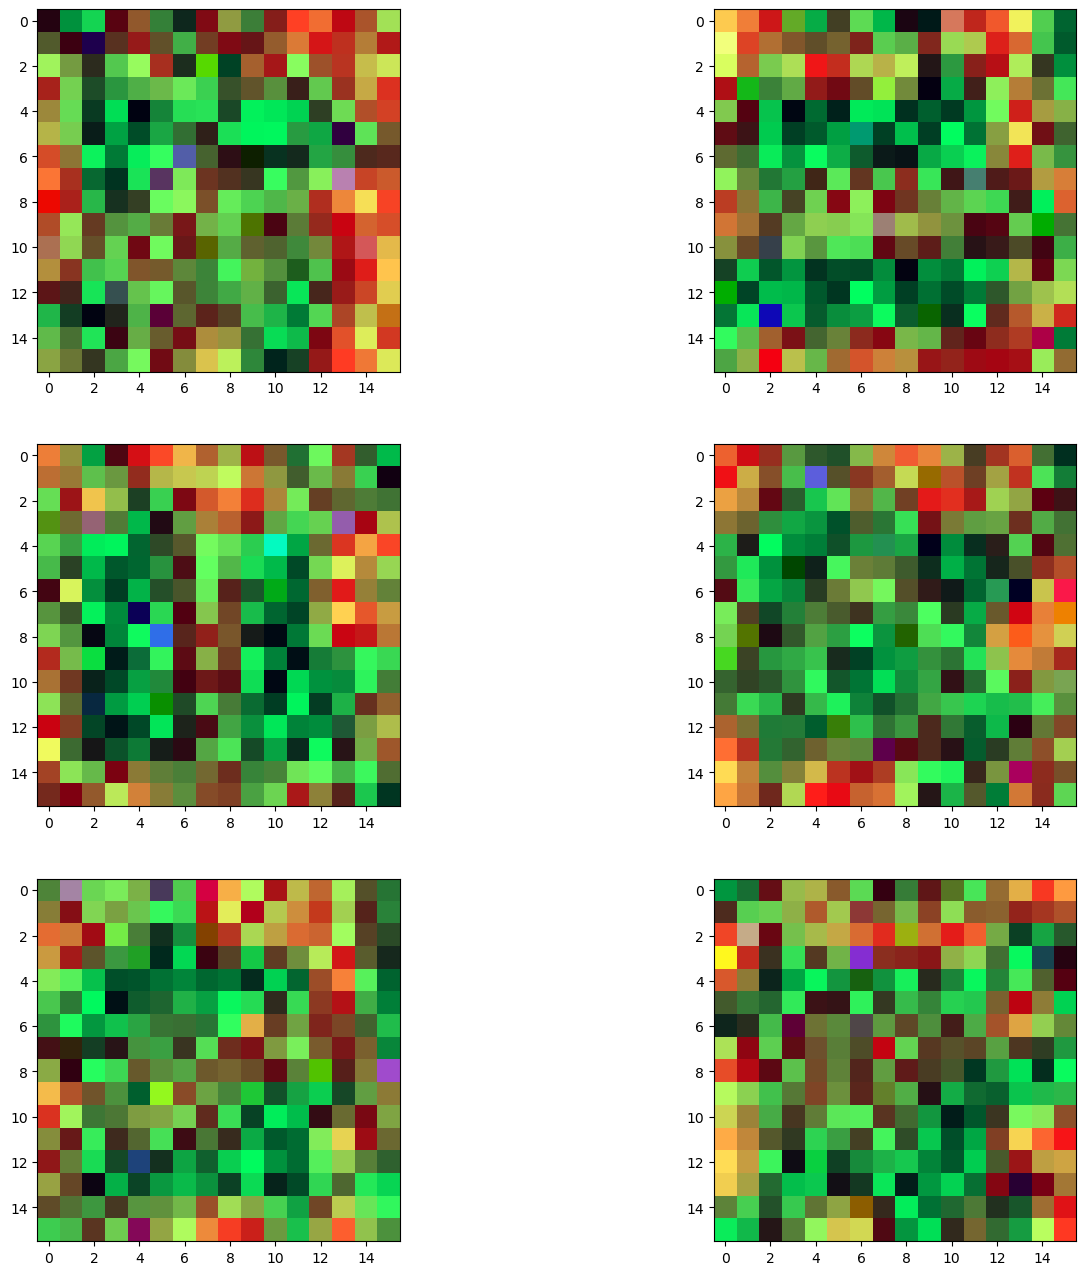

Labels: [nan  1.  0.  2.  1.  1.]


In [293]:
from matplotlib import pyplot as plt

def show_images1(images, n_row=3, n_col=2, figsize=[16, 16]):
    _, axs = plt.subplots(n_row, n_col, figsize=figsize)
    axs = axs.flatten()
    for img, ax in zip(images, axs):
        # Transpose image to put channels last and convert to float32
        img = img.transpose((1, 2, 0))
        ax.imshow(img.astype(np.uint8))
    plt.show()

# Display a subset of images
show_images1(images[:6])
print('Labels:', labels[:6])

# Assuming images is of shape (N, C, H, W) and labels is of shape (N,)
# Display the first 25 images
# Index: 0, Height: 0, Column: 1
# Index: 1, Height: 0, Column: 10
# Index: 2, Height: 0, Column: 5
# Index: 3, Height: 0, Column: 9
# Index: 4, Height: 0, Column: 1


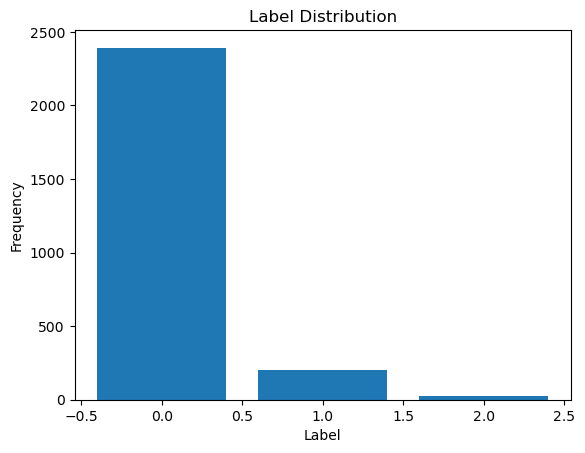

In [294]:
import matplotlib.pyplot as plt

# Assuming 'labels' is your array of labels
unique_labels, label_counts = np.unique(labels, return_counts=True)

plt.bar(unique_labels, label_counts)

plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()


In [295]:
labels = np.array(labels)
unique_values = np.unique(labels)
print(unique_values)


[ 0.  1.  2. nan]


In [305]:
# Create a boolean mask for NaN labels
nan_mask = np.isnan(labels)

# Remove rows with NaN labels
labels = labels[~nan_mask]
images = images[~nan_mask]

In [306]:
unique_values = np.unique(labels)
unique_values


array([0., 1., 2.], dtype=float16)

### 2. Detection and Handling of Missing Values

In [307]:
import numpy as np

print(images.shape)
# Count NaN values along each dimension
nan_count_dim0 = np.sum(np.isnan(images), axis=0)

# Print the results
print("Number of NaN values along dimension 0:", nan_count_dim0)
print(nan_count_dim0.shape)


(2620, 3, 16, 16)
Number of NaN values along dimension 0: [[[14 23 18 28 27 27 27 30 28 23 26 29 23 26 35 31]
  [33 21 35 26 18 24 23 23 23 27 26 37 25 26 20 34]
  [21 19 20 18 27 26 31 23 21 31 29 26 32 27 21 29]
  [21 24 37 30 20 23 37 22 28 28 28 29 26 29 28 19]
  [29 28 12 22 32 30 31 22 33 24 36 25 25 17 19 28]
  [21 21 26 17 31 33 25 22 21 34 18 22 25 27 22 17]
  [29 19 21 26 37 22 26 17 26 26 17 28 22 31 21 28]
  [23 19 21 31 30 22 30 23 25 24 17 22 36 28 22 35]
  [11 27 28 29 27 21 20 27 21 29 21 20 22 30 27 37]
  [29 29 20 29 32 15 26 20 22 24 35 26 29 28 22 23]
  [24 34 25 22 24 24 24 20 22 22 27 26 29 22 27 24]
  [26 31 20 28 25 24 34 26 28 24 32 17 35 25 31 16]
  [31 23 21 20 27 24 24 34 29 13 23 30 33 29 19 23]
  [23 33 26 26 31 25 31 29 25 32 28 36 21 30 33 30]
  [22 25 23 28 31 24 28 23 20 26 25 26 32 27 18 27]
  [21 36 30 30 21 25 20 27 29 27 23 23 32 31 31 24]]

 [[26 32 22 25 30 27 28 24 22 29 38 35 25 25 21 20]
  [18 23 30 22 20 20 27 33 33 19 24 21 19 29 34 20]
  [2

In [325]:

with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    images = data['image']
    labels = data['label']
    
print('Shape:', images.shape)
print('Shape:', labels.shape)

# Create a boolean mask for NaN labels
nan_mask = np.isnan(labels)

# Remove rows with NaN labels
labels = labels[~nan_mask]
images = images[~nan_mask]
image_test = images


Shape: (2911, 3, 16, 16)
Shape: (2911,)


In [334]:
def nearest_neighbor_interpolation(image):
    c, h, w = image.shape

    nan_mask = np.isnan(image)
    # Find indices of NaN values
    nan_indices = np.where(nan_mask)

    # Iterate through each NaN pixel and replace it with the mean of its neighbors
    for idx in range(len(nan_indices[0])):
        y, x = nan_indices[1][idx], nan_indices[2][idx]

        # Extract the 8 neighboring pixels for each channel without wrapping around
        for channel in range(c):
            valid_neighbors = [
                image[channel, y2, x2]
                for y2 in range(max(0, y - 1), min(h, y + 2))
                for x2 in range(max(0, x - 1), min(w, x + 2))
                if (y2, x2) != (y, x)
            ]

            # Calculate the mean of the valid neighbors and replace the NaN value for each channel
            image[channel, y, x] = np.nanmean(valid_neighbors)

    return image

images_interpolated1 = np.array([interpolate_nan_pixels(img) for img in image_test])


array([[[[ 2.5300e+02,  2.4000e+02,  2.0500e+02, ...,  2.4100e+02,
           8.1000e+01,  0.0000e+00],
         [ 2.4200e+02,  2.2100e+02,  1.7700e+02, ...,  2.1600e+02,
           6.8000e+01,  0.0000e+00],
         [ 2.1700e+02,  1.8100e+02,  1.2200e+02, ...,  1.7500e+02,
           5.3000e+01,  0.0000e+00],
         ...,
         [ 4.0000e+00,  8.0000e+00,  1.4000e+01, ...,  1.8200e+02,
           2.0200e+02,  2.0800e+02],
         [ 5.0000e+01,  9.2000e+01,  1.6100e+02, ...,  1.7500e+02,
           1.7300e+02,  1.7638e+02],
         [ 7.7000e+01,  1.4000e+02,  2.4400e+02, ...,  1.6600e+02,
           1.5300e+02,  1.4600e+02]],

        [[ 2.0200e+02,  1.2600e+02,  2.3000e+01, ...,  2.4200e+02,
           2.0600e+02,  1.0000e+02],
         [ 2.5500e+02,  6.7000e+01,  1.1100e+02, ...,  1.0400e+02,
           1.9700e+02,  9.0000e+01],
         [ 2.5400e+02,  9.9000e+01,  2.0300e+02, ...,  2.3700e+02,
           5.4000e+01,  1.4300e+02],
         ...,
         [ 1.1700e+02,  2.3000e+02

In [328]:
are_equal = np.array_equal(images_interpolated, images_interpolated1)


In [329]:
print(are_equal)

True


### 3. Detection and Handling of Outliers

In [165]:
import numpy as np
from scipy.stats import zscore

def remove_outliers(images, threshold=3):
    flattened_images = images.reshape(images.shape[0], -1)
    print(flattened_images.shape)
    z_scores = zscore(flattened_images, axis=None)
    outliers_mask = np.abs(z_scores) > threshold

    flattened_images_no_outliers = flattened_images.copy()
    flattened_images_no_outliers[outliers_mask] = 0

    images_no_outliers = flattened_images_no_outliers.reshape(images.shape)

    return images_no_outliers

# Assuming 'images' is your image dataset with shape (2620, 3, 16, 16)
# Remove outliers
images_no_outliers = remove_outliers(images)
print(images_no_outliers)


(2620, 768)
[[[[ 2.5300e+02  2.4000e+02  2.0500e+02 ...  2.4100e+02  8.1000e+01
     0.0000e+00]
   [ 2.4200e+02  2.2100e+02  1.7700e+02 ...  2.1600e+02  6.8000e+01
     0.0000e+00]
   [ 2.1700e+02  1.8100e+02  1.2200e+02 ...  1.7500e+02  5.3000e+01
     0.0000e+00]
   ...
   [ 4.0000e+00  8.0000e+00  1.4000e+01 ...  1.8200e+02  2.0200e+02
     2.0800e+02]
   [ 5.0000e+01  9.2000e+01  1.6100e+02 ...  1.7500e+02  1.7300e+02
     1.7638e+02]
   [ 7.7000e+01  1.4000e+02  2.4400e+02 ...  1.6600e+02  1.5300e+02
     1.4600e+02]]

  [[ 2.0200e+02  1.2600e+02  2.3000e+01 ...  2.4200e+02  2.0600e+02
     1.0000e+02]
   [ 2.5500e+02  6.7000e+01  1.1100e+02 ...  1.0400e+02  1.9700e+02
     9.0000e+01]
   [ 2.5400e+02  9.9000e+01  2.0300e+02 ...  2.3700e+02  5.4000e+01
     1.4300e+02]
   ...
   [ 1.1700e+02  2.3000e+02  8.0000e+00 ...  8.9000e+01  1.7700e+02
     4.0000e+01]
   [ 2.5100e+02  1.8900e+02  9.6000e+01 ...  5.9000e+01  1.0575e+02
     1.2300e+02]
   [ 1.6500e+02  1.7700e+02  0.0000e+

/Users/devanshubisht/anaconda3/envs/cs2109s/lib/python3.9/site-packages/numpy/core/_methods.py:212: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


In [272]:
print(images_no_outliers.shape)
# Count NaN values along each dimension
nan_count_dim0 = np.sum(np.isnan(images_no_outliers), axis=0)

# Print the results
print("Number of NaN values along dimension 0:", nan_count_dim0)
print(nan_count_dim0.shape)

(2620, 3, 16, 16)
Number of NaN values along dimension 0: [[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
  [0

In [167]:
import numpy as np
import matplotlib.pyplot as plt

def find_indices_above_threshold(images, threshold=256):
    indices_above_threshold = []

    for idx, img in enumerate(images):
        if np.any(img > threshold):
            indices_above_threshold.append(idx)

    return indices_above_threshold

def display_info_for_indices(images, indices):
    count = 0
    for idx in indices:
        img = images[idx]
        positions = np.where(img > 256)
        height = positions[1]
        col = positions[2]
        
        

        if len(height) == 0 or len(col) == 0:
            # No values above threshold in this image
            print(f"Index: {idx}, No values above threshold")
        else:
            print(f"Index: {idx}, Height: {height[0]}, Column: {col[0]}")
        
        count+=1
        
        if count == 5:
            break
        

# Replace this with your actual dataset
images = np.random.random((2620, 3, 16, 16)) * 300  # Example data with values above 256

# Find indices where RGB values are greater than 256
indices_with_values_above_256 = find_indices_above_threshold(images)

# Display information for the identified indices
display_info_for_indices(images, indices_with_values_above_256)


Index: 0, Height: 0, Column: 4
Index: 1, Height: 0, Column: 12
Index: 2, Height: 0, Column: 13
Index: 3, Height: 1, Column: 6
Index: 4, Height: 0, Column: 10


In [218]:
print(images_interpolated.shape)
print(labels.shape)


(2620, 3, 16, 16)
(2624,)


### 4. Detection and Handling of Class Imbalance

In [199]:
# data balancing
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Assuming you have images_interpolated and labels

# Reshape the images to (N, -1) where N is the number of samples
images_reshaped = images_interpolated.reshape(images_interpolated.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_reshaped, labels, test_size=0.2, random_state=42)

# Use RandomOverSampler to oversample the minority classes
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Reshape the images back to (N, 3, 16, 16)
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 3, 16, 16)

# Now you can use X_train_resampled and y_train_resampled for training


(array([0., 1., 2.], dtype=float16), array([2392,  203,   25]))

In [284]:
images_test = images_interpolated

In [285]:
import numpy as np
import torch

# Assuming labels 1 and 2 are minority classes
minority_labels = [1, 2]

# Find the number of instances of label 0
num_instances_label_0 = np.sum(labels == 0)

# Iterate over each minority class
for minority_label in minority_labels:
    # Find indices of samples belonging to the minority class
    minority_indices = np.where(labels == minority_label)[0]

    # Calculate the number of instances to add for augmentation
    num_instances_to_add = num_instances_label_0 - len(minority_indices)

    # Randomly sample from the minority class indices to match the count of label 0
    sampled_minority_indices = np.random.choice(minority_indices, size=num_instances_to_add, replace=True)

    # Apply your data augmentation to the samples at sampled_minority_indices
    for idx in sampled_minority_indices:
        # Assuming data is in the shape (C, H, W)
        image_data = torch.tensor(images_test[idx])  # Convert to PyTorch tensor

        # Apply transformations (you can customize these)
        if np.random.rand() < 0.5:
            # Random horizontal flip
            image_data = torch.flip(image_data, dims=[2])
        if np.random.rand() < 0.5:
            # Random vertical flip
            image_data = torch.flip(image_data, dims=[1])
        if np.random.rand() < 0.5:
            # Random rotation (clockwise)
            angle = np.random.uniform(-30, 30)
            image_data = torch.transpose(torch.flip(image_data, dims=[1]), 1, 2)  # Rotate 90 degrees clockwise

        # Append the augmented data to the original dataset
        images_test = np.concatenate([images_test, [image_data.numpy()]], axis=0)
        labels = np.concatenate([labels, [minority_label]])

# Now, images and labels contain the augmented dataset


In [290]:

print(images_test.shape)
print(np.unique(labels, return_counts=True))
images_test_copy = images_test
label_copy =labels
print(images_test_copy)

(7176, 3, 16, 16)
(array([0, 1, 2]), array([14,  9,  5]))
[[[[9.9219e-01 9.4141e-01 8.0371e-01 ... 9.4531e-01 3.1763e-01
    0.0000e+00]
   [9.4922e-01 8.6670e-01 6.9434e-01 ... 8.4717e-01 2.6660e-01
    0.0000e+00]
   [8.5107e-01 7.0996e-01 4.7852e-01 ... 6.8604e-01 2.0789e-01
    0.0000e+00]
   ...
   [1.5686e-02 3.1372e-02 5.4901e-02 ... 7.1387e-01 7.9199e-01
    8.1592e-01]
   [1.9604e-01 3.6084e-01 6.3135e-01 ... 6.8604e-01 6.7822e-01
    6.9189e-01]
   [3.0200e-01 5.4883e-01 9.5703e-01 ... 6.5088e-01 6.0010e-01
    5.7275e-01]]

  [[7.9199e-01 4.9414e-01 9.0210e-02 ... 9.4922e-01 8.0762e-01
    3.9209e-01]
   [1.0000e+00 2.6270e-01 4.3530e-01 ... 4.0796e-01 7.7246e-01
    3.5303e-01]
   [9.9609e-01 3.8818e-01 7.9590e-01 ... 9.2920e-01 2.1179e-01
    5.6055e-01]
   ...
   [4.5874e-01 9.0186e-01 3.1372e-02 ... 3.4912e-01 6.9434e-01
    1.5686e-01]
   [9.8438e-01 7.4121e-01 3.7646e-01 ... 2.3132e-01 4.1479e-01
    4.8242e-01]
   [6.4697e-01 6.9434e-01 0.0000e+00 ... 5.8838e-02 9.252

In [289]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_test_copy, label_copy, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a PyTorch DataLoader for the training set
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create a PyTorch DataLoader for the test set
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the CNN model

class CNN(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.3):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        # self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after the first convolution
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout2d(p=dropout_rate)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        # self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after the second convolution
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout2d(p=dropout_rate)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc = nn.Linear(64 * 4 * 4, num_classes)

    def forward(self, x):
        x = self.pool1(self.dropout1(self.act1(self.conv1(x))))
        x = self.pool2(self.dropout2(self.act2(self.conv2(x))))
        x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
        x = self.fc(x)
        return x

# Instantiate the model
num_classes = 3  # Change this based on your dataset
model = SimpleCNN(num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Testing the model
model.eval()
all_predictions = []
all_true_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predictions = torch.argmax(outputs, dim=1)
        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(labels.cpu().numpy())

# Calculate F2 score
f2_score = fbeta_score(all_true_labels, all_predictions, beta=2, average='macro')

print(f"F2 Score: {f2_score}")


F2 Score: 0.9321839232494916


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class Model:  
    """
    This class represents an AI model.
    """
    
    def __init__(self):
        """
        Constructor for Model class.
  
        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.
        self.model = None

    def nearest_neighbor_interpolation(self, image):
        c, h, w = image.shape

        nan_mask = np.isnan(image)
        # Find indices of NaN values
        nan_indices = np.where(nan_mask)

        # Iterate through each NaN pixel and replace it with the mean of its neighbors
        for idx in range(len(nan_indices[0])):
            y, x = nan_indices[1][idx], nan_indices[2][idx]

            # Extract the 8 neighboring pixels for each channel without wrapping around
            for channel in range(c):
                valid_neighbors = [
                    image[channel, y2, x2]
                    for y2 in range(max(0, y - 1), min(h, y + 2))
                    for x2 in range(max(0, x - 1), min(w, x + 2))
                    if (y2, x2) != (y, x)
                ]

                # Calculate the mean of the valid neighbors and replace the NaN value for each channel
                image[channel, y, x] = np.nanmean(valid_neighbors)

        return image

    images_interpolated1 = np.array([interpolate_nan_pixels(img) for img in image_test])

    def oversample(self, images, labels):
        minority_labels = [1, 2]
        # Find the number of instances of label 0
        num_instances_label_0 = np.sum(labels == 0)
        for minority_label in minority_labels:
            # Find indices of samples belonging to the minority class
            minority_indices = np.where(labels == minority_label)[0]
            # Calculate the number of instances to add for augmentation
            num_instances_to_add = num_instances_label_0 - len(minority_indices)
            # Randomly sample from the minority class indices to match the count of label 0
            sampled_minority_indices = np.random.choice(minority_indices, size=num_instances_to_add, replace=True)
            # Apply your data augmentation to the samples at sampled_minority_indices
            for idx in sampled_minority_indices:
                # Assuming data is in the shape (C, H, W)
                image_data = torch.tensor(images[idx])  # Convert to PyTorch tensor
                # Apply transformations (you can customize these)
                if np.random.rand() < 0.2:
                    # Random horizontal flip
                    image_data = torch.flip(image_data, dims=[2])
                if np.random.rand() < 0.2:
                    # Random rotation (clockwise)
                    angle = np.random.uniform(-30, 30)
                    image_data = torch.transpose(torch.flip(image_data, dims=[1]), 1, 2)  # Rotate 90 degrees clockwis

                # Append the augmented data to the original dataset
                images = np.concatenate([images, [image_data.numpy()]], axis=0)
                labels = np.concatenate([labels, [minority_label]])
        
        return images, labels
    
    def preprocess(self, X, y= None):
        if y is not None:
            # Remove NaN labels
            nan_mask = np.isnan(y)
            labels = y[~nan_mask]
            images = X[~nan_mask]

            images[images < 0] = 0  # Set negative pixel values to 0
            images[images > 255] = 255  # Set pixel values > 1 to 1

            # Interpolate missing values
            images = np.array([self.nearest_neighbor_interpolation(img) for img in images])

            # Standardize values
            images = images / 255.0

            # Oversample to handle imbalance through augmentation
            images, labels = self.oversample(images, labels)

            return (images, labels)
        
        else:
            print("Preprocessing test data")
            X[X < 0] = 0  # Set negative pixel values to 0
            X[X > 255] = 255
            # Standardize values
            X = X/255.0
            images = np.array([self.nearest_neighbor_interpolation(img) for img in X])
            return (images)

    
    def fit(self, X, y):
        images, labels = self.preprocess(X, y)
        nan_count_dim0 = np.sum(np.isnan(images), axis=0)

        images_train = torch.tensor(images, dtype=torch.float32)
        y_train_tensor = torch.tensor(labels, dtype=torch.long)
        train_dataset = TensorDataset(images_train, y_train_tensor)
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

        class CNN(nn.Module):
            def __init__(self, num_classes, dropout_rate=0.3):
                super(CNN, self).__init__()
                self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
                self.bn1 = nn.BatchNorm2d(32)  # BatchNorm after the first convolution
                self.act1 = nn.ReLU()
                self.dropout1 = nn.Dropout2d(p=dropout_rate)
                self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

                self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
                self.bn2 = nn.BatchNorm2d(64)  # BatchNorm after the second convolution
                self.act2 = nn.ReLU()
                self.dropout2 = nn.Dropout2d(p=dropout_rate)
                self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

                self.fc = nn.Linear(64 * 4 * 4, num_classes)

            def forward(self, x):
                x = self.pool1(self.dropout1(self.act1(self.bn1(self.conv1(x)))))
                x = self.pool2(self.dropout2(self.act2(self.bn2(self.conv2(x)))))
                x = x.view(x.size(0), -1)  # Flatten the tensor for the fully connected layer
                x = self.fc(x)
                return x
        
                train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

        # class CNN(nn.Module):
        #     def __init__(self, num_classes, dropout_rate=0.2):
        #         super(CNN, self).__init__()
        #         self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        #         self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        #         self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
                
        #         self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        #         self.act = nn.LeakyReLU(negative_slope=0.02)
        #         self.dropout = nn.Dropout2d(p=dropout_rate)
        #         self.flatten = nn.Flatten()

        #         self.fc1 = nn.Linear(128 * 2 * 2, num_classes)  # New linear layer
        #         # self.relu = nn.ReLU()  # ReLU activation
        #         # self.fc2 = nn.Linear(256, num_classes)

        #     def forward(self, x):
        #         x = self.dropout(self.pool(self.act(self.conv1(x))))
        #         x = self.dropout(self.pool(self.act(self.conv2(x))))
        #         x = self.dropout(self.pool(self.act(self.conv3(x))))
        #         x = self.flatten(x)

        #         # Apply the new linear layer with ReLU activation
        #         x = self.fc1(x)
        #         return x


        # Instantiate the model
        num_classes = 3  # Change this based on your dataset
        self.model = CNN(num_classes)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.RMSprop(self.model.parameters(), lr=0.001)

        # Training the model
        num_epochs = 50
        for _ in range(num_epochs):
            self.model.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()


        return self
    
    def predict(self, X):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X : ndarray of shape (n_samples, channel, height, width)
            Input data.
            
        Returns
        -------
        ndarray of shape (n_samples,)
        Predicted target values per element in X.
           
        """
        # Preprocess the test data
        X = self.preprocess(X)
        
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Make predictions using the trained neural network
        with torch.no_grad():
            outputs = self.model(X_tensor)

        _, predicted_labels = torch.max(outputs, 1)

        # Convert PyTorch tensor to numpy array
        return predicted_labels.numpy()
    

### 5. Understanding Relationship Between Variables

### 6. Data Visualization

## Data Preprocessing

### 7. General Preprocessing

### 8. Feature Selection

### 9. Feature Engineering

## Modeling & Evaluation

### 10. Creating models

### 11. Model Evaluation

### 12. Hyperparameters Search